<a href="https://colab.research.google.com/github/Mystic6303/ML-DL-projects/blob/main/logistic_regression_heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import pandas as pd
from sklearn import linear_model,metrics
df=pd.read_csv("framingham.csv")
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [159]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [160]:
df1=df.fillna(df.mean())
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

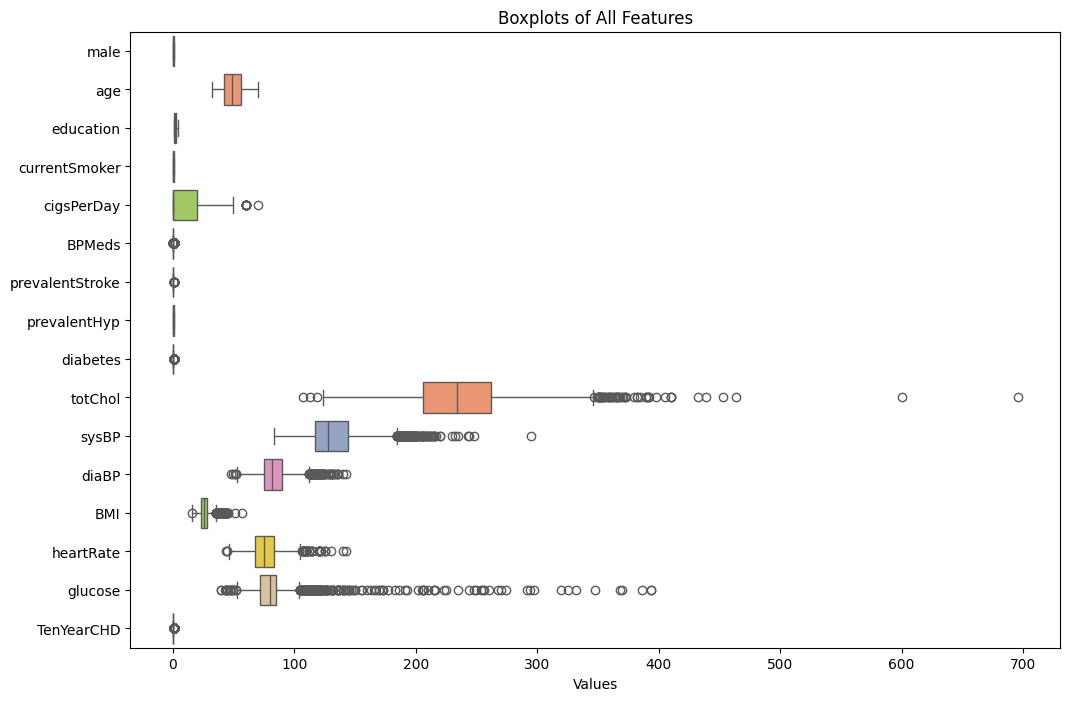

(4238, 16)


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, orient="h", palette="Set2")
plt.title('Boxplots of All Features')
plt.xlabel('Values')
plt.show()
print(df1.shape)

In [162]:
#to remove outliers
colout=['glucose','totChol','sysBP','heartRate','BMI','diaBP']
for col in colout:
  # Calculate the mean and standard deviation of the column
  mean = df1[col].mean()
  std = df1[col].std()

  # Define the criterion for identifying outliers
  outlier_condition = (df[col] - mean).abs() > 2 * std
  #Filter the DataFrame to remove rows with outliers in the specified column
  df1 = df1[~outlier_condition]

<ipython-input-162-07a6ccf760fd>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[~outlier_condition]


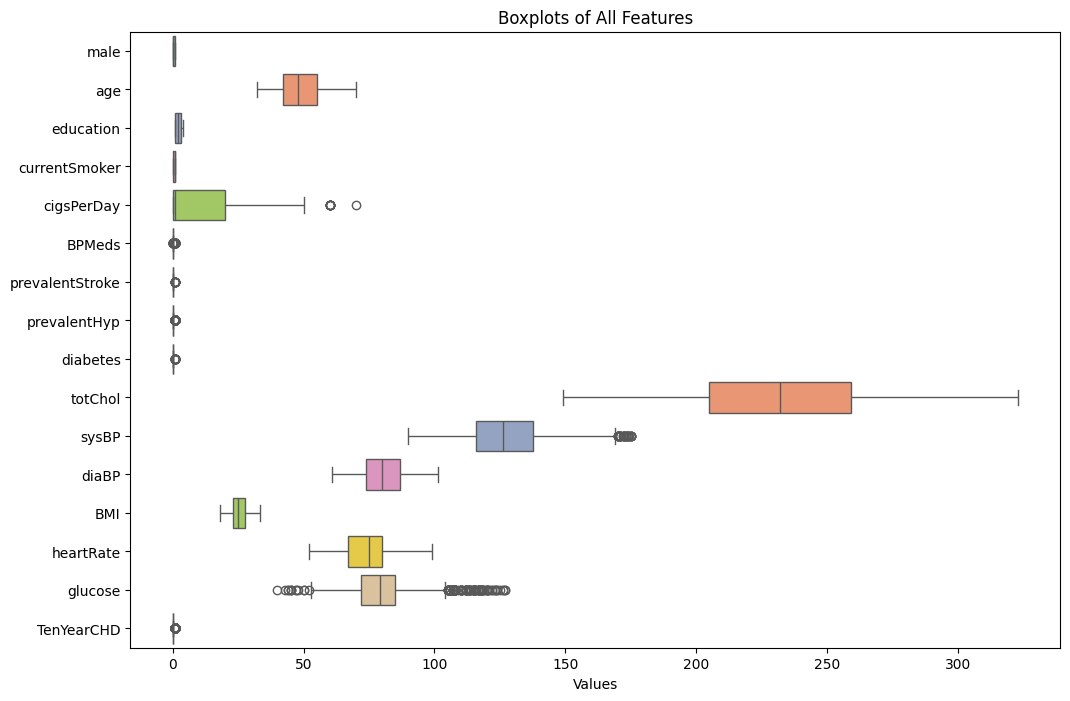

(3277, 16)


In [163]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, orient="h", palette="Set2")
plt.title('Boxplots of All Features')
plt.xlabel('Values')
plt.show()
print(df1.shape)

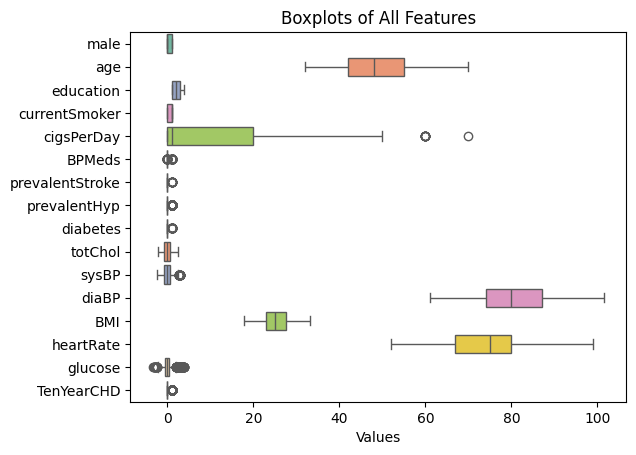

(3277, 16)


In [164]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['totChol', 'sysBP', 'glucose']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the specified columns and transform them
scaled_columns = scaler.fit_transform(df1[columns_to_scale])

# Replace the original columns with the scaled columns in the DataFrame
df1[columns_to_scale] = scaled_columns
sns.boxplot(data=df1, orient="h", palette="Set2")
plt.title('Boxplots of All Features')
plt.xlabel('Values')
plt.show()
print(df1.shape)

In [165]:
X = df1.drop(columns=['TenYearCHD'])  # Features
y = df1['TenYearCHD']  # Target variable

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Create Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=3000)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)



In [167]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [168]:
# Prediction
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 85.8739837398374


In [169]:
y1=model.predict(X_test.iloc[2:10,:])
#print(X_test.iloc[2:5,:])

print("Expected: ",y_test.iloc[2:10])
print("Predicted: ",y1)

Expected:  3982    0
3227    1
2343    1
2804    0
2464    0
3764    0
329     0
3913    0
Name: TenYearCHD, dtype: int64
Predicted:  [0 0 0 0 0 0 0 0]


In [170]:
#using tensorflow:
import tensorflow as tf
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='sigmoid',input_shape=(X_train.shape[1],))
])
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model1.fit(X_train,y_train,epochs=70,verbose=1,validation_data=(X_test,y_test))


Epoch 1/70
72/72 [==============================] - 1s 5ms/step - loss: 9.2732 - accuracy: 0.8757 - val_loss: 9.1592 - val_accuracy: 0.8587
Epoch 2/70
72/72 [==============================] - 1s 12ms/step - loss: 7.2932 - accuracy: 0.8757 - val_loss: 6.9082 - val_accuracy: 0.8587
Epoch 3/70
72/72 [==============================] - 0s 3ms/step - loss: 5.2792 - accuracy: 0.8757 - val_loss: 4.5870 - val_accuracy: 0.8587
Epoch 4/70
72/72 [==============================] - 0s 3ms/step - loss: 3.3095 - accuracy: 0.8735 - val_loss: 2.4870 - val_accuracy: 0.8384
Epoch 5/70
72/72 [==============================] - 0s 3ms/step - loss: 2.0195 - accuracy: 0.8317 - val_loss: 1.7953 - val_accuracy: 0.7978
Epoch 6/70
72/72 [==============================] - 0s 3ms/step - loss: 1.6434 - accuracy: 0.8072 - val_loss: 1.5490 - val_accuracy: 0.7937
Epoch 7/70
72/72 [==============================] - 0s 3ms/step - loss: 1.4169 - accuracy: 0.8003 - val_loss: 1.3370 - val_accuracy: 0.7988
Epoch 8/70
72/72 [=

In [171]:
loss = model1.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
#print(f'Test accuracy: {accuracy}')

31/31 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8506
Test loss: [0.39505937695503235, 0.8506097793579102]


Test Loss: [0.39505937695503235, 0.8506097793579102]


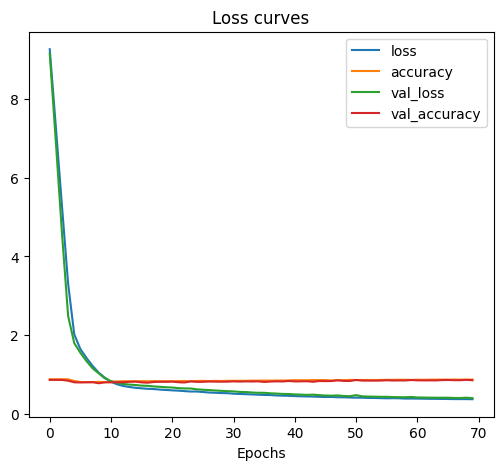

In [172]:
print("Test Loss:", loss)
pd.DataFrame(history.history).plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title('Loss curves')
plt.legend();